# Análisis Exploratorio de Datos (EDA) - Dataset de Películas

Este notebook contiene un análisis exploratorio completo del dataset de películas, incluyendo:
- Carga y exploración inicial de datos
- Análisis estadístico descriptivo
- Análisis de distribuciones
- Análisis de géneros
- Correlaciones
- Visualizaciones
- Insights y conclusiones

## 1. Importación de Librerías y Carga de Datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [2]:
# Cargar el dataset de películas
with open('movies.json', 'r', encoding='utf-8') as f:
    movies_data = json.load(f)

# Convertir a DataFrame
df = pd.DataFrame(movies_data)

print(f"✓ Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"\nPrimeras filas del dataset:")
df.head(10)

✓ Dataset cargado exitosamente
Dimensiones del dataset: 1768 filas y 7 columnas

Primeras filas del dataset:


,ID,name,puan,genre_1,genre_2,pop,description
0,1,The Godfather,9.2,Crime,Drama,99,A timeless saga of a mafia family and their pu...
1,2,The Dark Knight,9.0,Action,Crime,96,A gripping tale of Batman facing his most icon...
2,3,Pulp Fiction,8.9,Crime,Drama,95,A masterful intertwining of crime stories with...
3,4,Inception,8.8,Sci-Fi,Thriller,94,A mind-bending journey through dreams and the ...
4,5,Forrest Gump,8.8,Drama,Romance,93,A heartwarming story of an extraordinary man w...
5,6,The Matrix,8.7,Sci-Fi,Action,92,A revolutionary sci-fi thriller about the natu...
6,7,The Shawshank Redemption,9.3,Drama,Crime,98,"A powerful story of hope, friendship, and resi..."
7,8,Fight Club,8.8,Drama,Thriller,91,"A provocative exploration of identity, consume..."
8,9,The Avengers,8.4,Action,Sci-Fi,89,A thrilling superhero team-up to save the worl...
9,10,Interstellar,8.6,Sci-Fi,Adventure,93,An epic journey through space to ensure humani...


## 2. Información General del Dataset

In [3]:
# Información general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
print(f"\nNúmero total de películas: {df.shape[0]}")
print(f"Número de características: {df.shape[1]}")
print(f"\nColumnas del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col} ({df[col].dtype})")

print(f"\n{'=' * 80}")
print("INFORMACIÓN DETALLADA")
print("=" * 80)
df.info()

INFORMACIÓN GENERAL DEL DATASET

Número total de películas: 1768
Número de características: 7

Columnas del dataset:
  1. ID (int64)
  2. name (object)
  3. puan (float64)
  4. genre_1 (object)
  5. genre_2 (object)
  6. pop (int64)
  7. description (object)

INFORMACIÓN DETALLADA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1768 non-null   int64  
 1   name         1768 non-null   object 
 2   puan         1768 non-null   float64
 3   genre_1      1768 non-null   object 
 4   genre_2      1768 non-null   object 
 5   pop          1768 non-null   int64  
 6   description  1768 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 96.8+ KB


In [4]:
# Verificar valores nulos
print("=" * 80)
print("ANÁLISIS DE VALORES NULOS")
print("=" * 80)

null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Nulos': null_counts.values,
    'Porcentaje (%)': null_percentages.values
})

print(null_info.to_string(index=False))

if null_counts.sum() == 0:
    print("\n✓ ¡Excelente! No hay valores nulos en el dataset")
else:
    print(f"\n⚠ Total de valores nulos: {null_counts.sum()}")

ANÁLISIS DE VALORES NULOS
    Columna  Valores Nulos  Porcentaje (%)
         ID              0             0.0
       name              0             0.0
       puan              0             0.0
    genre_1              0             0.0
    genre_2              0             0.0
        pop              0             0.0
description              0             0.0

✓ ¡Excelente! No hay valores nulos en el dataset


In [5]:
# Verificar duplicados
print("=" * 80)
print("ANÁLISIS DE DUPLICADOS")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

# Verificar duplicados por ID
duplicate_ids = df['ID'].duplicated().sum()
print(f"Número de IDs duplicados: {duplicate_ids}")

# Verificar duplicados por nombre
duplicate_names = df['name'].duplicated().sum()
print(f"Número de nombres duplicados: {duplicate_names}")

if duplicates == 0:
    print("\n✓ No hay filas duplicadas en el dataset")
else:
    print(f"\n⚠ Se encontraron {duplicates} filas duplicadas")

ANÁLISIS DE DUPLICADOS
Número de filas duplicadas: 0
Número de IDs duplicados: 0
Número de nombres duplicados: 28

✓ No hay filas duplicadas en el dataset


## 3. Análisis Estadístico Descriptivo

In [6]:
# Estadísticas descriptivas de variables numéricas
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)

# Descripción estadística
desc_stats = df[['puan', 'pop']].describe()
print(desc_stats)

print("\n" + "=" * 80)
print("ESTADÍSTICAS ADICIONALES")
print("=" * 80)

# Estadísticas adicionales
for col in ['puan', 'pop']:
    print(f"\n{col.upper()}:")
    print(f"  Rango: {df[col].min()} - {df[col].max()}")
    print(f"  Mediana: {df[col].median()}")
    print(f"  Moda: {df[col].mode().values[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"  Varianza: {df[col].var():.2f}")
    print(f"  Desviación estándar: {df[col].std():.2f}")
    print(f"  Coeficiente de variación: {(df[col].std() / df[col].mean() * 100):.2f}%")

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
              puan          pop
count  1768.000000  1768.000000
mean      7.471606    78.678167
std       0.600770     7.611903
min       3.600000    49.000000
25%       7.100000    73.000000
50%       7.500000    79.000000
75%       7.900000    84.000000
max       9.300000    99.000000

ESTADÍSTICAS ADICIONALES

PUAN:
  Rango: 3.6 - 9.3
  Mediana: 7.5
  Moda: 7.6
  Varianza: 0.36
  Desviación estándar: 0.60
  Coeficiente de variación: 8.04%

POP:
  Rango: 49 - 99
  Mediana: 79.0
  Moda: 80
  Varianza: 57.94
  Desviación estándar: 7.61
  Coeficiente de variación: 9.67%


## 4. Análisis de Distribución de Variables Numéricas

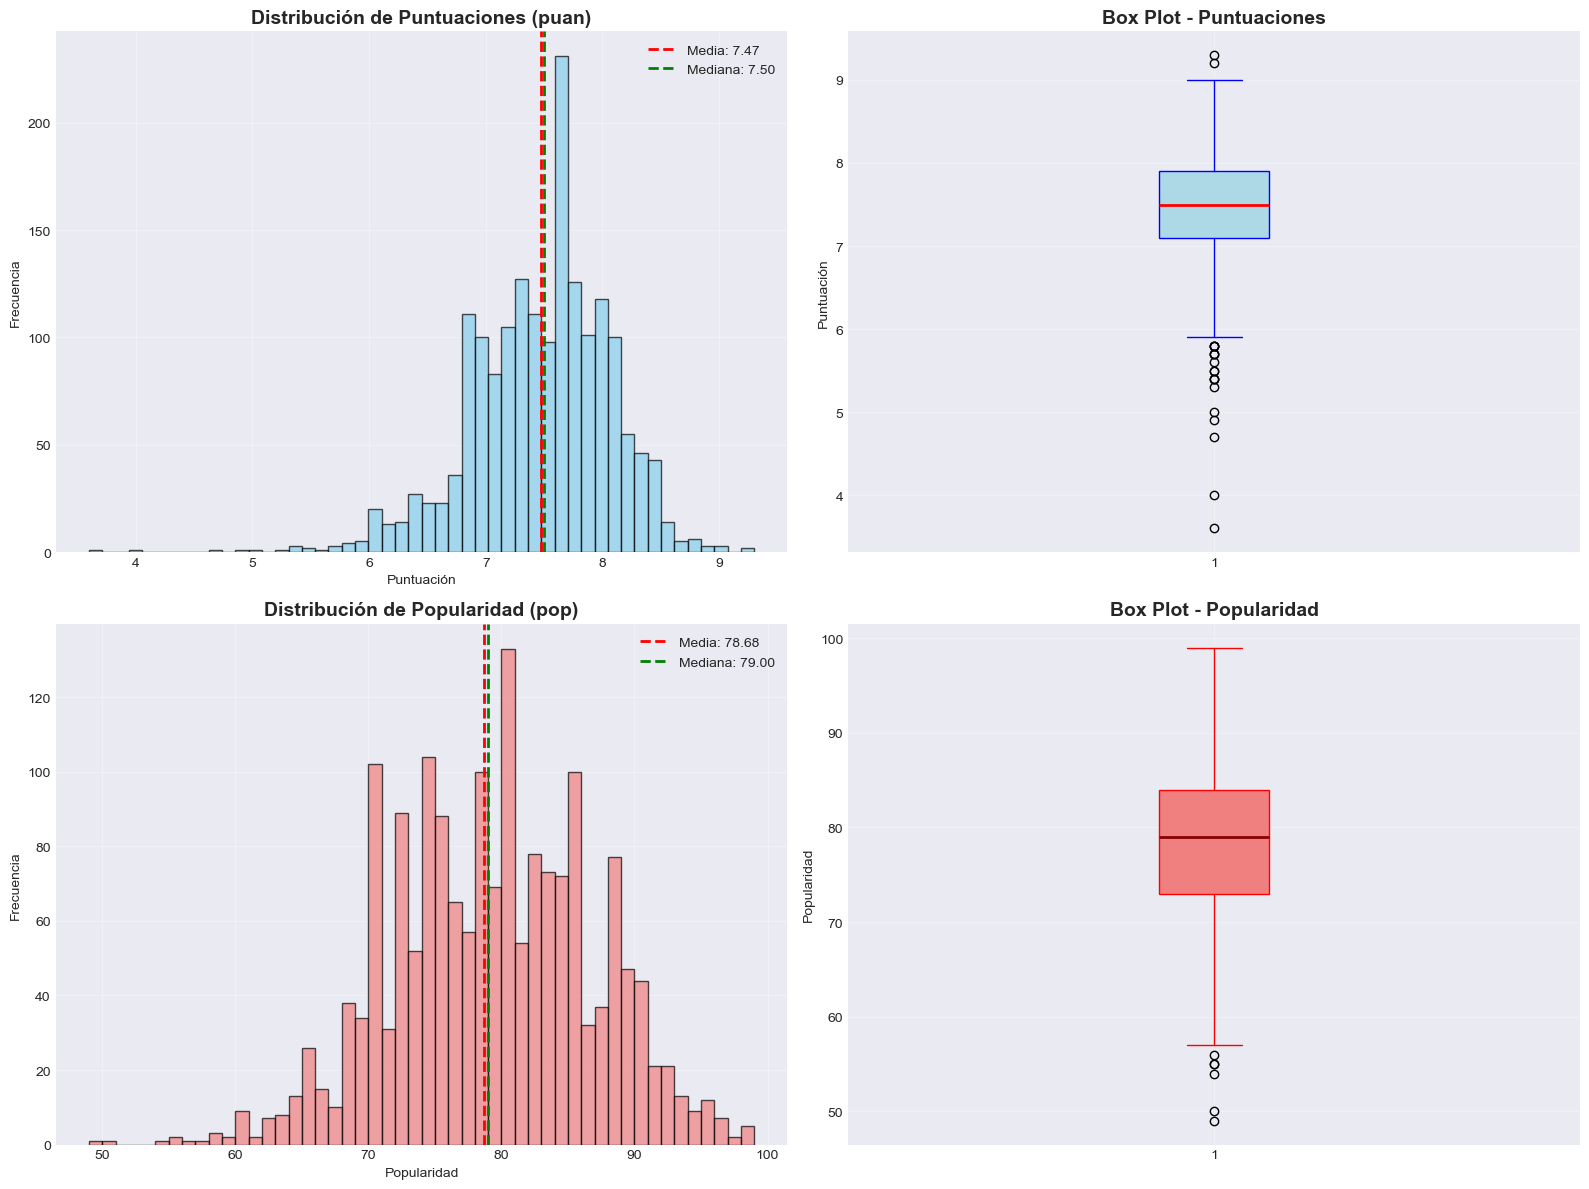


📊 Interpretación:
  • Puntuación media: 7.47 (rango: 3.6-9.3)
  • Popularidad media: 78.68 (rango: 49-99)


In [7]:
# Distribución de puntuación (puan)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de puntuación
axes[0, 0].hist(df['puan'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución de Puntuaciones (puan)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Puntuación')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['puan'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["puan"].mean():.2f}')
axes[0, 0].axvline(df['puan'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["puan"].median():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot de puntuación
axes[0, 1].boxplot(df['puan'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='blue'),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(color='blue'),
                   capprops=dict(color='blue'))
axes[0, 1].set_title('Box Plot - Puntuaciones', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Puntuación')
axes[0, 1].grid(True, alpha=0.3)

# Histograma de popularidad
axes[1, 0].hist(df['pop'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribución de Popularidad (pop)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Popularidad')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(df['pop'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["pop"].mean():.2f}')
axes[1, 0].axvline(df['pop'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["pop"].median():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Box plot de popularidad
axes[1, 1].boxplot(df['pop'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', color='red'),
                   medianprops=dict(color='darkred', linewidth=2),
                   whiskerprops=dict(color='red'),
                   capprops=dict(color='red'))
axes[1, 1].set_title('Box Plot - Popularidad', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Popularidad')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretación:")
print(f"  • Puntuación media: {df['puan'].mean():.2f} (rango: {df['puan'].min()}-{df['puan'].max()})")
print(f"  • Popularidad media: {df['pop'].mean():.2f} (rango: {df['pop'].min()}-{df['pop'].max()})")

## 5. Análisis de Géneros

In [8]:
# Análisis de géneros principales y secundarios
print("=" * 80)
print("ANÁLISIS DE GÉNEROS")
print("=" * 80)

# Contar géneros primarios
genre1_counts = df['genre_1'].value_counts()
print("\nGÉNEROS PRIMARIOS (Top 10):")
print(genre1_counts.head(10))

# Contar géneros secundarios
genre2_counts = df['genre_2'].value_counts()
print("\n\nGÉNEROS SECUNDARIOS (Top 10):")
print(genre2_counts.head(10))

# Todos los géneros únicos
all_genres = pd.concat([df['genre_1'], df['genre_2']]).unique()
print(f"\n\nTotal de géneros únicos: {len(all_genres)}")
print(f"Géneros: {sorted(all_genres)}")

ANÁLISIS DE GÉNEROS

GÉNEROS PRIMARIOS (Top 10):
genre_1
Drama        710
Comedy       252
Action       203
Animation    105
Romance       89
Crime         70
Sci-Fi        66
Horror        65
Biography     50
Adventure     40
Name: count, dtype: int64


GÉNEROS SECUNDARIOS (Top 10):
genre_2
Drama        381
Romance      251
Thriller     160
Comedy       159
Adventure    113
Crime         81
War           77
Fantasy       75
Mystery       72
Sci-Fi        64
Name: count, dtype: int64


Total de géneros únicos: 52
Géneros: ['', 'Action', 'Adventure', 'Animation', 'Anthology', 'Art', 'Biographical', 'Biography', 'Classic', 'Comedy', 'Coming of Age', 'Crime', 'Dark', 'Dark Comedy', 'Documentary', 'Drama', 'Experimental', 'Family', 'Fantasy', 'Feminism', 'Historical', 'History', 'Horror', 'Indie', 'LGBTQ', 'LGBTQ+', 'Mockumentary', 'Music', 'Musical', 'Mystery', 'Mythology', 'Philosophical', 'Philosophy', 'Political', 'Psychological', 'Religion', 'Road Movie', 'Romance', 'Romantic', 'Satir

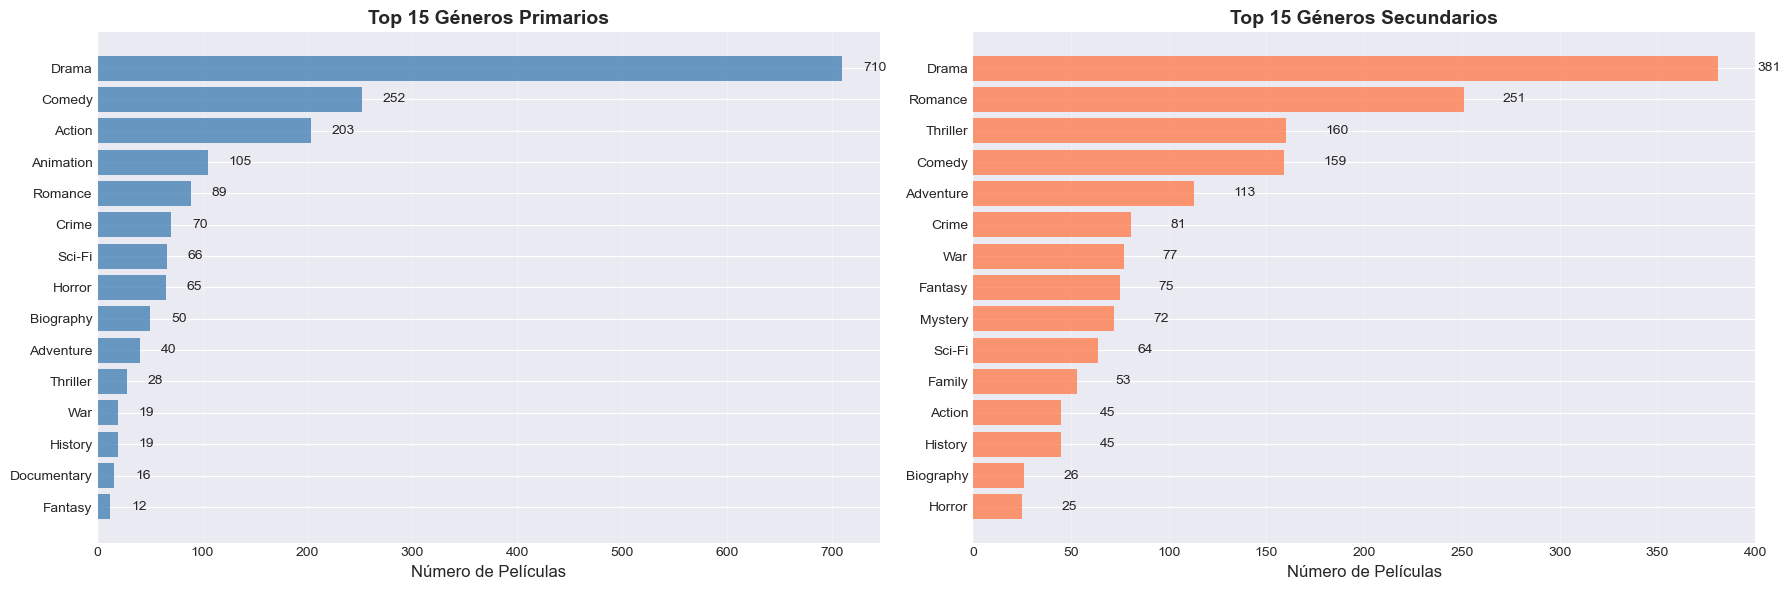

In [9]:
# Visualización de distribución de géneros
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 15 géneros primarios
top_genre1 = df['genre_1'].value_counts().head(15)
axes[0].barh(range(len(top_genre1)), top_genre1.values, color='steelblue', alpha=0.8)
axes[0].set_yticks(range(len(top_genre1)))
axes[0].set_yticklabels(top_genre1.index)
axes[0].set_xlabel('Número de Películas', fontsize=12)
axes[0].set_title('Top 15 Géneros Primarios', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
for i, v in enumerate(top_genre1.values):
    axes[0].text(v + 20, i, str(v), va='center', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='x')

# Top 15 géneros secundarios
top_genre2 = df['genre_2'].value_counts().head(15)
axes[1].barh(range(len(top_genre2)), top_genre2.values, color='coral', alpha=0.8)
axes[1].set_yticks(range(len(top_genre2)))
axes[1].set_yticklabels(top_genre2.index)
axes[1].set_xlabel('Número de Películas', fontsize=12)
axes[1].set_title('Top 15 Géneros Secundarios', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
for i, v in enumerate(top_genre2.values):
    axes[1].text(v + 20, i, str(v), va='center', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

TOP 20 COMBINACIONES DE GÉNEROS
 1. Drama + Romance                          -  198 películas
 2. Comedy + Drama                           -  111 películas
 3. Drama + Thriller                         -   74 películas
 4. Drama + War                              -   63 películas
 5. Romance + Comedy                         -   55 películas
 6. Drama + Mystery                          -   47 películas
 7. Biography + Drama                        -   45 películas
 8. Crime + Drama                            -   45 películas
 9. Action + Adventure                       -   43 películas
10. Animation + Adventure                    -   42 películas
11. Drama + Comedy                           -   42 películas
12. Drama + Family                           -   41 películas
13. Comedy + Romance                         -   40 películas
14. Drama + History                          -   40 películas
15. Action + Drama                           -   35 películas
16. Action + Sci-Fi                   

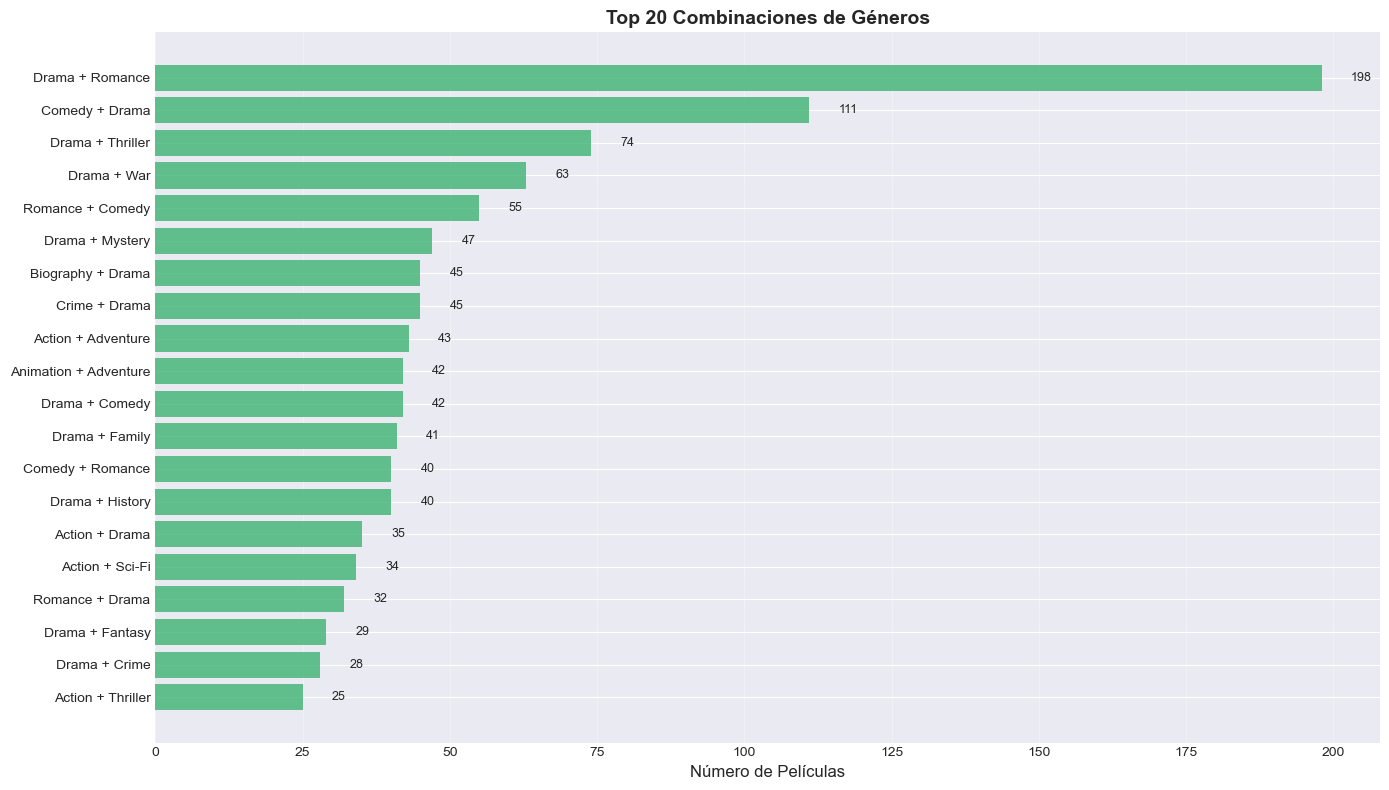

In [10]:
# Análisis de combinaciones de géneros más frecuentes
df['genre_combination'] = df['genre_1'] + ' + ' + df['genre_2']
top_combinations = df['genre_combination'].value_counts().head(20)

print("=" * 80)
print("TOP 20 COMBINACIONES DE GÉNEROS")
print("=" * 80)
for i, (combo, count) in enumerate(top_combinations.items(), 1):
    print(f"{i:2d}. {combo:40s} - {count:4d} películas")

# Visualización
plt.figure(figsize=(14, 8))
plt.barh(range(len(top_combinations)), top_combinations.values, color='mediumseagreen', alpha=0.8)
plt.yticks(range(len(top_combinations)), top_combinations.index, fontsize=10)
plt.xlabel('Número de Películas', fontsize=12)
plt.title('Top 20 Combinaciones de Géneros', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_combinations.values):
    plt.text(v + 5, i, str(v), va='center', fontsize=9)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 6. Análisis de Puntuación por Género

ESTADÍSTICAS DE PUNTUACIÓN POR GÉNERO PRIMARIO
             mean  median   std  count
genre_1                               
Family       8.10    8.10   NaN      1
Crime        7.91    7.90  0.51     70
Documentary  7.73    7.70  0.34     16
Biography    7.68    7.70  0.54     50
Romantic     7.60    7.45  0.50      4
Adventure    7.59    7.70  0.71     40
Thriller     7.58    7.60  0.43     28
Drama        7.58    7.60  0.53    710
Western      7.55    7.55  0.35      2
War          7.55    7.70  0.54     19
Musical      7.50    7.50  0.14      2
Sci-Fi       7.49    7.60  0.77     66
Mystery      7.49    7.30  0.49     11
History      7.48    7.50  0.46     19
Historical   7.45    7.50  0.41      4
Animation    7.45    7.60  0.68    105
Comedy       7.37    7.30  0.52    252
Action       7.29    7.40  0.67    203
Fantasy      7.27    7.30  0.69     12
Romance      7.04    7.00  0.59     89
Horror       7.01    7.00  0.61     65


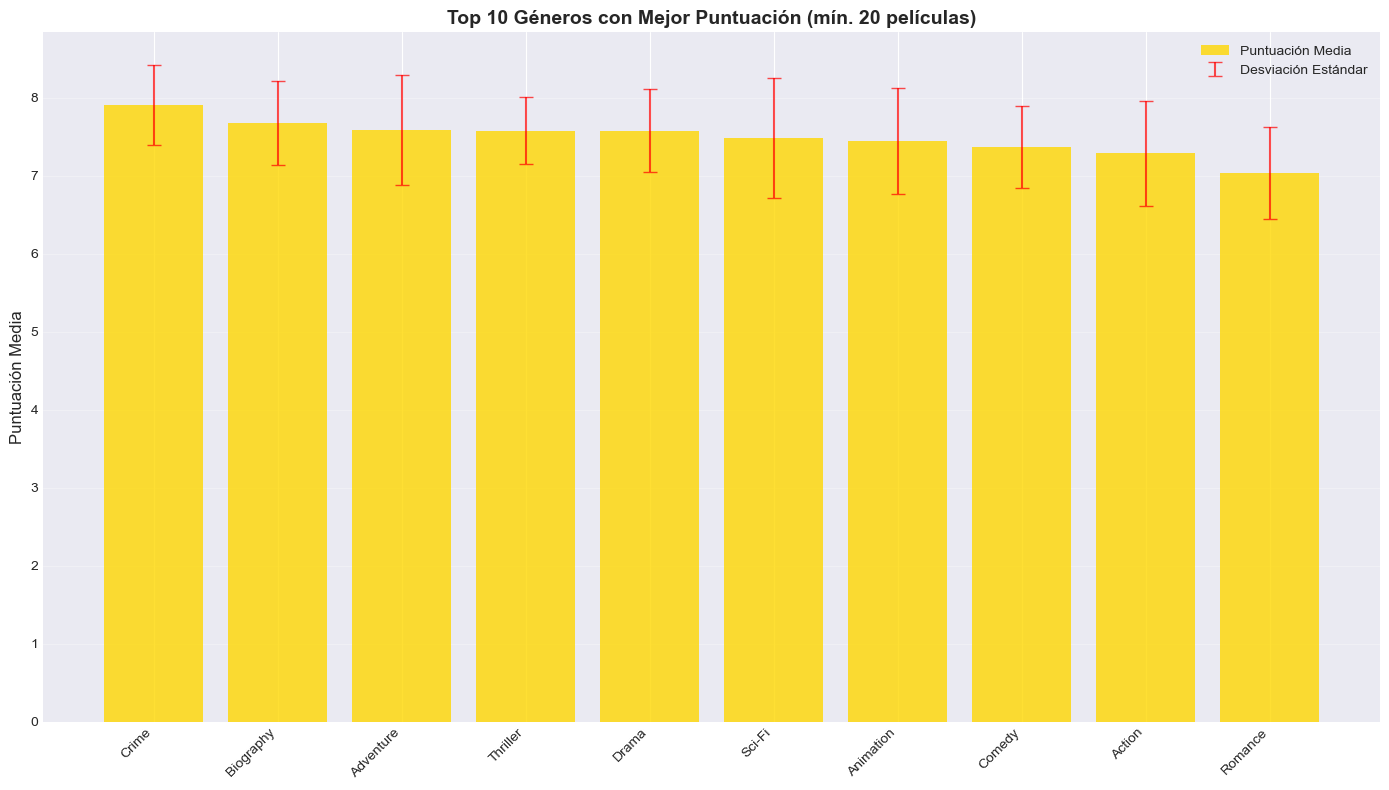

In [11]:
# Estadísticas de puntuación por género primario
genre_stats = df.groupby('genre_1')['puan'].agg(['mean', 'median', 'std', 'count']).round(2)
genre_stats = genre_stats.sort_values('mean', ascending=False)

print("=" * 80)
print("ESTADÍSTICAS DE PUNTUACIÓN POR GÉNERO PRIMARIO")
print("=" * 80)
print(genre_stats.to_string())

# Top 10 géneros con mejor puntuación promedio (mínimo 20 películas)
top_rated_genres = genre_stats[genre_stats['count'] >= 20].head(10)

plt.figure(figsize=(14, 8))
x = range(len(top_rated_genres))
plt.bar(x, top_rated_genres['mean'], color='gold', alpha=0.8, label='Puntuación Media')
plt.errorbar(x, top_rated_genres['mean'], yerr=top_rated_genres['std'], 
             fmt='none', ecolor='red', capsize=5, alpha=0.7, label='Desviación Estándar')
plt.xticks(x, top_rated_genres.index, rotation=45, ha='right')
plt.ylabel('Puntuación Media', fontsize=12)
plt.title('Top 10 Géneros con Mejor Puntuación (mín. 20 películas)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

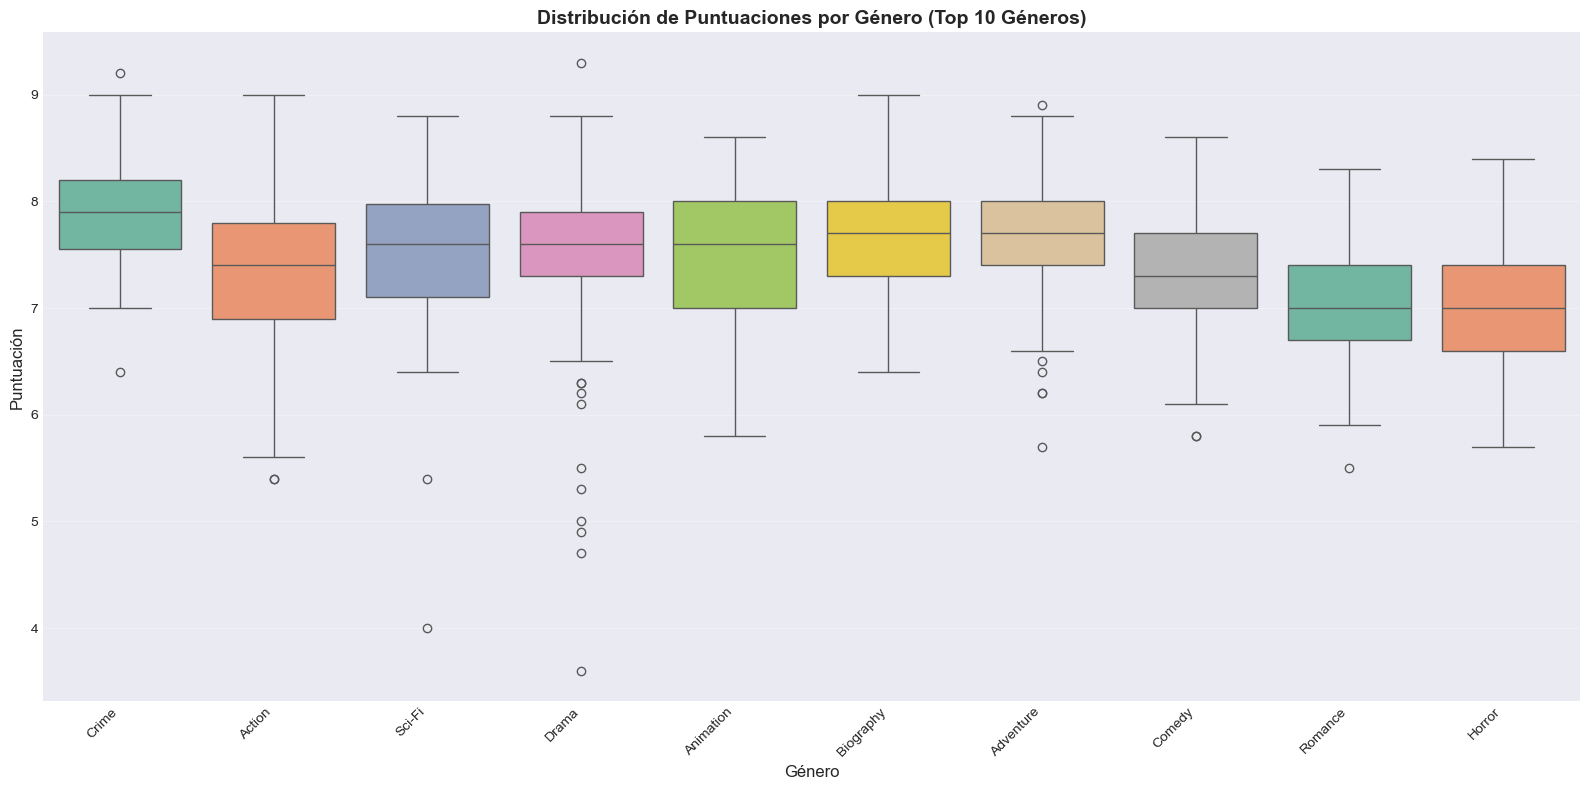

In [12]:
# Box plot de puntuaciones por género (top 10 géneros más frecuentes)
top_10_genres = df['genre_1'].value_counts().head(10).index
df_top_genres = df[df['genre_1'].isin(top_10_genres)]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_top_genres, x='genre_1', y='puan', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Puntuación', fontsize=12)
plt.title('Distribución de Puntuaciones por Género (Top 10 Géneros)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 7. Análisis de Popularidad por Género

ESTADÍSTICAS DE POPULARIDAD POR GÉNERO PRIMARIO
              mean  median    std  count
genre_1                                 
Adventure    83.92    84.5   7.24     40
Musical      83.50    83.5   2.12      2
Crime        83.33    83.5   7.44     70
Action       83.25    84.0   6.04    203
Sci-Fi       82.68    83.0   7.17     66
Romantic     81.25    79.0   7.46      4
Biography    80.82    81.0   7.50     50
War          80.63    80.0   6.82     19
Animation    79.51    80.0   7.42    105
Romance      78.10    78.0   5.31     89
Thriller     78.07    76.5   6.62     28
Family       78.00    78.0    NaN      1
History      77.89    77.0   5.34     19
Drama        77.11    77.0   7.43    710
Comedy       77.04    77.0   7.81    252
Horror       76.20    76.0   6.24     65
Mystery      76.18    75.0   8.91     11
Western      75.00    75.0   4.24      2
Documentary  73.88    73.5   6.13     16
Fantasy      73.83    75.0  11.45     12
Historical   69.75    68.0   4.19      4


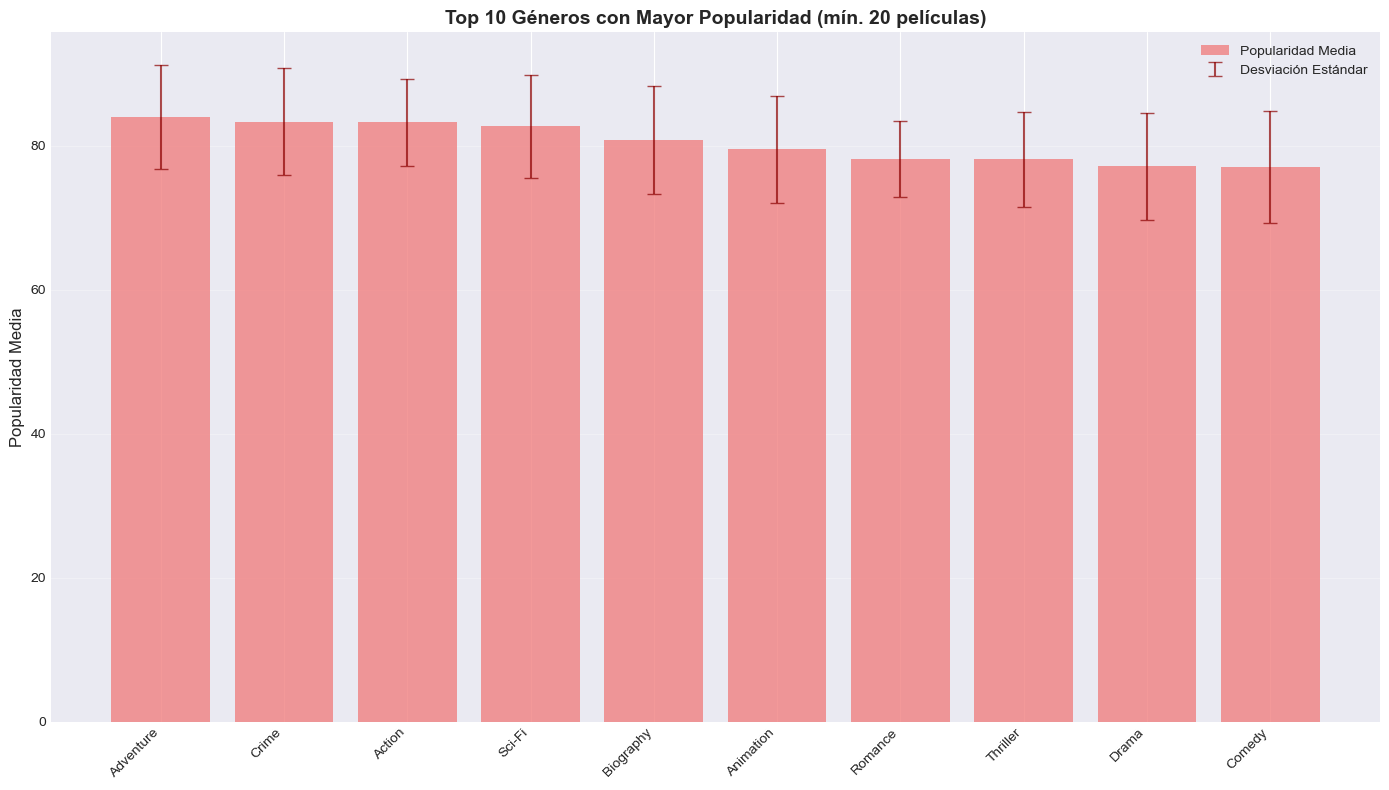

In [18]:
# Estadísticas de popularidad por género
pop_stats = df.groupby('genre_1')['pop'].agg(['mean', 'median', 'std', 'count']).round(2)
pop_stats = pop_stats.sort_values('mean', ascending=False)

print("=" * 80)
print("ESTADÍSTICAS DE POPULARIDAD POR GÉNERO PRIMARIO")
print("=" * 80)
print(pop_stats.to_string())

# Visualización
top_pop_genres = pop_stats[pop_stats['count'] >= 20].head(10)

plt.figure(figsize=(14, 8))
x = range(len(top_pop_genres))
plt.bar(x, top_pop_genres['mean'], color='lightcoral', alpha=0.8, label='Popularidad Media')
plt.errorbar(x, top_pop_genres['mean'], yerr=top_pop_genres['std'], 
             fmt='none', ecolor='darkred', capsize=5, alpha=0.7, label='Desviación Estándar')
plt.xticks(x, top_pop_genres.index, rotation=45, ha='right')
plt.ylabel('Popularidad Media', fontsize=12)
plt.title('Top 10 Géneros con Mayor Popularidad (mín. 20 películas)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 8. Correlación entre Variables

MATRIZ DE CORRELACIÓN
          puan       pop
puan  1.000000  0.582729
pop   0.582729  1.000000


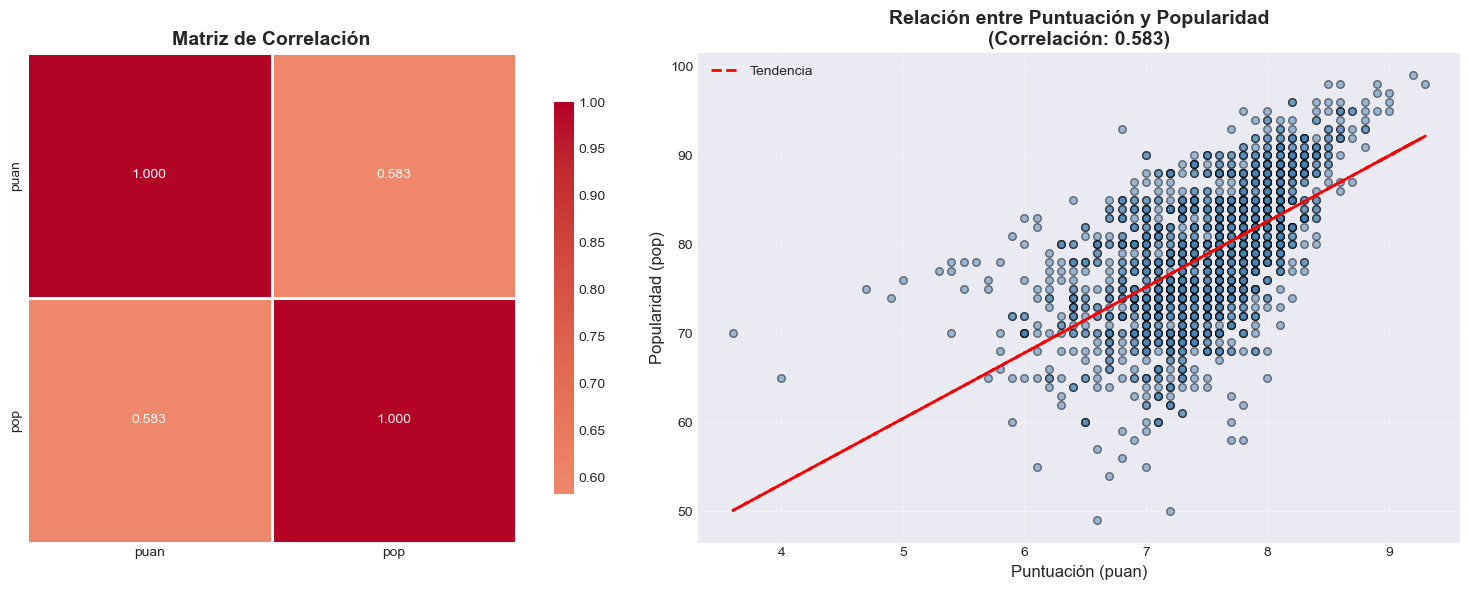


📊 Interpretación:
  • Existe una correlación MODERADA positiva (0.583) entre puntuación y popularidad


In [19]:
# Matriz de correlación
correlation_matrix = df[['puan', 'pop']].corr()

print("=" * 80)
print("MATRIZ DE CORRELACIÓN")
print("=" * 80)
print(correlation_matrix)

# Visualización de la matriz de correlación
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            fmt='.3f', ax=axes[0])
axes[0].set_title('Matriz de Correlación', fontsize=14, fontweight='bold')

# Scatter plot de puntuación vs popularidad
axes[1].scatter(df['puan'], df['pop'], alpha=0.5, color='steelblue', edgecolors='black', s=30)
axes[1].set_xlabel('Puntuación (puan)', fontsize=12)
axes[1].set_ylabel('Popularidad (pop)', fontsize=12)
axes[1].set_title(f'Relación entre Puntuación y Popularidad\n(Correlación: {correlation_matrix.loc["puan", "pop"]:.3f})', 
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Línea de tendencia
z = np.polyfit(df['puan'], df['pop'], 1)
p = np.poly1d(z)
axes[1].plot(df['puan'], p(df['puan']), "r--", linewidth=2, label='Tendencia')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\n📊 Interpretación:")
corr_value = correlation_matrix.loc['puan', 'pop']
if corr_value > 0.7:
    print(f"  • Existe una correlación FUERTE positiva ({corr_value:.3f}) entre puntuación y popularidad")
elif corr_value > 0.4:
    print(f"  • Existe una correlación MODERADA positiva ({corr_value:.3f}) entre puntuación y popularidad")
elif corr_value > 0:
    print(f"  • Existe una correlación DÉBIL positiva ({corr_value:.3f}) entre puntuación y popularidad")
else:
    print(f"  • La correlación es negativa o nula ({corr_value:.3f})")

## 9. Top Películas

In [14]:
# Top 20 películas mejor puntuadas
print("=" * 80)
print("TOP 20 PELÍCULAS MEJOR PUNTUADAS")
print("=" * 80)
top_rated = df.nlargest(20, 'puan')[['name', 'puan', 'pop', 'genre_1', 'genre_2']]
print(top_rated.to_string(index=False))

# Top 20 películas más populares
print("\n" + "=" * 80)
print("TOP 20 PELÍCULAS MÁS POPULARES")
print("=" * 80)
top_popular = df.nlargest(20, 'pop')[['name', 'puan', 'pop', 'genre_1', 'genre_2']]
print(top_popular.to_string(index=False))

TOP 20 PELÍCULAS MEJOR PUNTUADAS
                                             name  puan  pop   genre_1   genre_2
                         The Shawshank Redemption   9.3   98     Drama     Crime
                                    The Godfather   9.2   99     Crime     Drama
                                  The Dark Knight   9.0   96    Action     Crime
                                 Schindler's List   9.0   97 Biography     Drama
                            The Godfather Part II   9.0   95     Crime     Drama
                                     Pulp Fiction   8.9   95     Crime     Drama
    The Lord of the Rings: The Return of the King   8.9   97 Adventure   Fantasy
                           The Godfather Part III   8.9   98     Crime     Drama
                                        Inception   8.8   94    Sci-Fi  Thriller
                                     Forrest Gump   8.8   93     Drama   Romance
                                       Fight Club   8.8   91     Drama  Thri

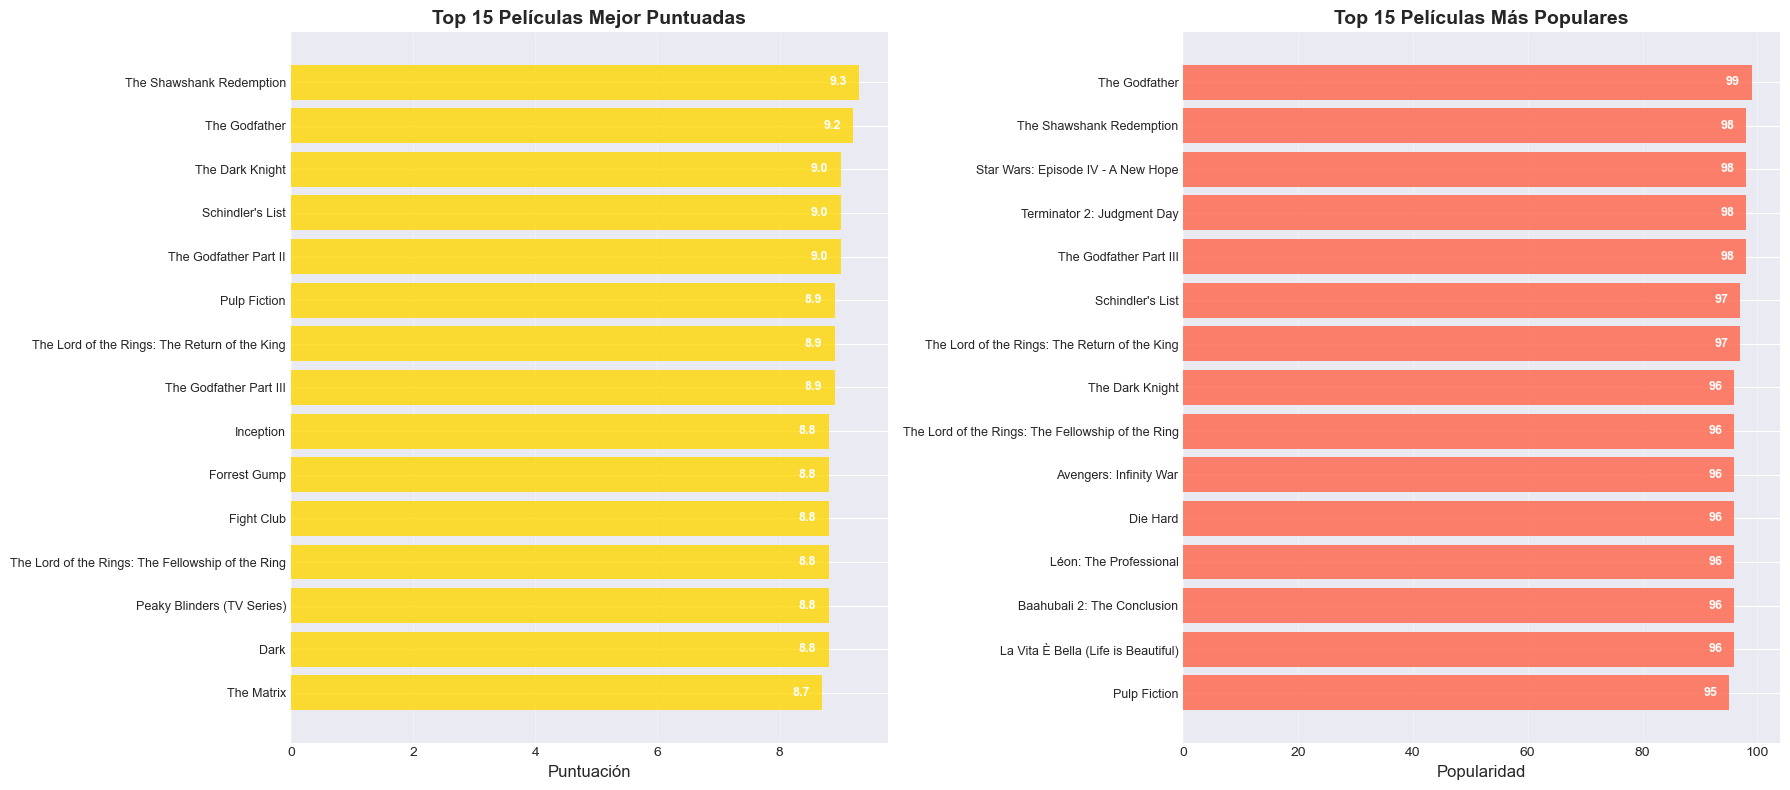

In [15]:
# Visualización de top películas
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 películas mejor puntuadas
top_15_rated = df.nlargest(15, 'puan')
axes[0].barh(range(len(top_15_rated)), top_15_rated['puan'], color='gold', alpha=0.8)
axes[0].set_yticks(range(len(top_15_rated)))
axes[0].set_yticklabels(top_15_rated['name'], fontsize=9)
axes[0].set_xlabel('Puntuación', fontsize=12)
axes[0].set_title('Top 15 Películas Mejor Puntuadas', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
for i, v in enumerate(top_15_rated['puan'].values):
    axes[0].text(v - 0.2, i, f'{v:.1f}', va='center', ha='right', fontsize=9, color='white', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Top 15 películas más populares
top_15_pop = df.nlargest(15, 'pop')
axes[1].barh(range(len(top_15_pop)), top_15_pop['pop'], color='tomato', alpha=0.8)
axes[1].set_yticks(range(len(top_15_pop)))
axes[1].set_yticklabels(top_15_pop['name'], fontsize=9)
axes[1].set_xlabel('Popularidad', fontsize=12)
axes[1].set_title('Top 15 Películas Más Populares', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
for i, v in enumerate(top_15_pop['pop'].values):
    axes[1].text(v - 2, i, str(v), va='center', ha='right', fontsize=9, color='white', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 10. Análisis de Outliers

In [20]:
# Detección de outliers usando IQR (Interquartile Range)
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=" * 80)
print("ANÁLISIS DE OUTLIERS")
print("=" * 80)

# Outliers en puntuación
outliers_puan, lower_puan, upper_puan = detect_outliers(df, 'puan')
print(f"\nPUNTUACIÓN (puan):")
print(f"  Límite inferior: {lower_puan:.2f}")
print(f"  Límite superior: {upper_puan:.2f}")
print(f"  Número de outliers: {len(outliers_puan)}")
if len(outliers_puan) > 0:
    print(f"  Películas con outliers en puntuación:")
    print(outliers_puan[['name', 'puan', 'pop']].to_string(index=False))

# Outliers en popularidad
outliers_pop, lower_pop, upper_pop = detect_outliers(df, 'pop')
print(f"\n\nPOPULARIDAD (pop):")
print(f"  Límite inferior: {lower_pop:.2f}")
print(f"  Límite superior: {upper_pop:.2f}")
print(f"  Número de outliers: {len(outliers_pop)}")
if len(outliers_pop) > 0 and len(outliers_pop) <= 20:
    print(f"  Películas con outliers en popularidad:")
    print(outliers_pop[['name', 'puan', 'pop']].to_string(index=False))

ANÁLISIS DE OUTLIERS

PUNTUACIÓN (puan):
  Límite inferior: 5.90
  Límite superior: 9.10
  Número de outliers: 21
  Películas con outliers en puntuación:
                                     name  puan  pop
                            The Godfather   9.2   99
                 The Shawshank Redemption   9.3   98
                                Allegiant   5.7   75
              The Twilight Saga: Twilight   5.3   77
              The Twilight Saga: New Moon   4.7   75
               The Twilight Saga: Eclipse   5.0   76
The Twilight Saga: Breaking Dawn - Part 1   4.9   74
The Twilight Saga: Breaking Dawn - Part 2   5.5   78
                        Wonder Woman 1984   5.4   77
                      X-Men: Dark Phoenix   5.8   78
                 The Matrix Resurrections   5.7   76
                    Pacific Rim: Uprising   5.6   78
                                 The Room   3.6   70
                  Plan 9 from Outer Space   4.0   65
                       Observe and Report   5.8   6

## 10.5. Pruebas de Hipótesis Estadísticas

En esta sección realizaremos pruebas de hipótesis para validar estadísticamente nuestras observaciones sobre las distribuciones de puntuación y popularidad.

### 10.5.1. Prueba de Normalidad

Primero, verificaremos si las distribuciones de puntuación y popularidad siguen una distribución normal usando:
- **Test de Shapiro-Wilk**: Más potente para muestras pequeñas a medianas
- **Test de Kolmogorov-Smirnov**: Útil para comparar con distribución teórica
- **Test de D'Agostino-Pearson**: Basado en asimetría y curtosis

**Hipótesis:**
- H₀: Los datos siguen una distribución normal
- H₁: Los datos NO siguen una distribución normal
- Nivel de significancia: α = 0.05

In [21]:
from scipy import stats
from scipy.stats import shapiro, kstest, normaltest, anderson

print("=" * 80)
print("PRUEBAS DE NORMALIDAD")
print("=" * 80)

# Función para interpretar p-value
def interpret_pvalue(p_value, alpha=0.05):
    if p_value < alpha:
        return "❌ RECHAZAR H₀", "Los datos NO siguen una distribución normal"
    else:
        return "✓ NO RECHAZAR H₀", "Los datos siguen una distribución normal"

# ============================================================================
# PRUEBAS PARA PUNTUACIÓN (puan)
# ============================================================================
print("\n" + "=" * 80)
print("PUNTUACIÓN (puan)")
print("=" * 80)

# 1. Test de Shapiro-Wilk
shapiro_stat_puan, shapiro_p_puan = shapiro(df['puan'])
decision, interpretation = interpret_pvalue(shapiro_p_puan)
print(f"\n1. Test de Shapiro-Wilk:")
print(f"   Estadístico: {shapiro_stat_puan:.6f}")
print(f"   P-valor: {shapiro_p_puan:.6f}")
print(f"   Decisión: {decision}")
print(f"   Interpretación: {interpretation}")

# 2. Test de Kolmogorov-Smirnov
# Estandarizamos los datos
puan_standardized = (df['puan'] - df['puan'].mean()) / df['puan'].std()
ks_stat_puan, ks_p_puan = kstest(puan_standardized, 'norm')
decision, interpretation = interpret_pvalue(ks_p_puan)
print(f"\n2. Test de Kolmogorov-Smirnov:")
print(f"   Estadístico: {ks_stat_puan:.6f}")
print(f"   P-valor: {ks_p_puan:.6f}")
print(f"   Decisión: {decision}")
print(f"   Interpretación: {interpretation}")

# 3. Test de D'Agostino-Pearson
dagostino_stat_puan, dagostino_p_puan = normaltest(df['puan'])
decision, interpretation = interpret_pvalue(dagostino_p_puan)
print(f"\n3. Test de D'Agostino-Pearson:")
print(f"   Estadístico: {dagostino_stat_puan:.6f}")
print(f"   P-valor: {dagostino_p_puan:.6f}")
print(f"   Decisión: {decision}")
print(f"   Interpretación: {interpretation}")

# 4. Test de Anderson-Darling
anderson_result_puan = anderson(df['puan'], dist='norm')
print(f"\n4. Test de Anderson-Darling:")
print(f"   Estadístico: {anderson_result_puan.statistic:.6f}")
print(f"   Valores críticos: {anderson_result_puan.critical_values}")
print(f"   Niveles de significancia: {anderson_result_puan.significance_level}%")
if anderson_result_puan.statistic < anderson_result_puan.critical_values[2]:  # 5% level
    print(f"   Decisión: ✓ NO RECHAZAR H₀ (al 5%)")
else:
    print(f"   Decisión: ❌ RECHAZAR H₀ (al 5%)")

# ============================================================================
# PRUEBAS PARA POPULARIDAD (pop)
# ============================================================================
print("\n\n" + "=" * 80)
print("POPULARIDAD (pop)")
print("=" * 80)

# 1. Test de Shapiro-Wilk
shapiro_stat_pop, shapiro_p_pop = shapiro(df['pop'])
decision, interpretation = interpret_pvalue(shapiro_p_pop)
print(f"\n1. Test de Shapiro-Wilk:")
print(f"   Estadístico: {shapiro_stat_pop:.6f}")
print(f"   P-valor: {shapiro_p_pop:.6f}")
print(f"   Decisión: {decision}")
print(f"   Interpretación: {interpretation}")

# 2. Test de Kolmogorov-Smirnov
pop_standardized = (df['pop'] - df['pop'].mean()) / df['pop'].std()
ks_stat_pop, ks_p_pop = kstest(pop_standardized, 'norm')
decision, interpretation = interpret_pvalue(ks_p_pop)
print(f"\n2. Test de Kolmogorov-Smirnov:")
print(f"   Estadístico: {ks_stat_pop:.6f}")
print(f"   P-valor: {ks_p_pop:.6f}")
print(f"   Decisión: {decision}")
print(f"   Interpretación: {interpretation}")

# 3. Test de D'Agostino-Pearson
dagostino_stat_pop, dagostino_p_pop = normaltest(df['pop'])
decision, interpretation = interpret_pvalue(dagostino_p_pop)
print(f"\n3. Test de D'Agostino-Pearson:")
print(f"   Estadístico: {dagostino_stat_pop:.6f}")
print(f"   P-valor: {dagostino_p_pop:.6f}")
print(f"   Decisión: {decision}")
print(f"   Interpretación: {interpretation}")

# 4. Test de Anderson-Darling
anderson_result_pop = anderson(df['pop'], dist='norm')
print(f"\n4. Test de Anderson-Darling:")
print(f"   Estadístico: {anderson_result_pop.statistic:.6f}")
print(f"   Valores críticos: {anderson_result_pop.critical_values}")
print(f"   Niveles de significancia: {anderson_result_pop.significance_level}%")
if anderson_result_pop.statistic < anderson_result_pop.critical_values[2]:  # 5% level
    print(f"   Decisión: ✓ NO RECHAZAR H₀ (al 5%)")
else:
    print(f"   Decisión: ❌ RECHAZAR H₀ (al 5%)")

print("\n" + "=" * 80)

PRUEBAS DE NORMALIDAD

PUNTUACIÓN (puan)

1. Test de Shapiro-Wilk:
   Estadístico: 0.969920
   P-valor: 0.000000
   Decisión: ❌ RECHAZAR H₀
   Interpretación: Los datos NO siguen una distribución normal

2. Test de Kolmogorov-Smirnov:
   Estadístico: 0.067081
   P-valor: 0.000000
   Decisión: ❌ RECHAZAR H₀
   Interpretación: Los datos NO siguen una distribución normal

3. Test de D'Agostino-Pearson:
   Estadístico: 225.364634
   P-valor: 0.000000
   Decisión: ❌ RECHAZAR H₀
   Interpretación: Los datos NO siguen una distribución normal

4. Test de Anderson-Darling:
   Estadístico: 8.779744
   Valores críticos: [0.575 0.655 0.785 0.916 1.09 ]
   Niveles de significancia: [15.  10.   5.   2.5  1. ]%
   Decisión: ❌ RECHAZAR H₀ (al 5%)


POPULARIDAD (pop)

1. Test de Shapiro-Wilk:
   Estadístico: 0.994048
   P-valor: 0.000002
   Decisión: ❌ RECHAZAR H₀
   Interpretación: Los datos NO siguen una distribución normal

2. Test de Kolmogorov-Smirnov:
   Estadístico: 0.047519
   P-valor: 0.000658

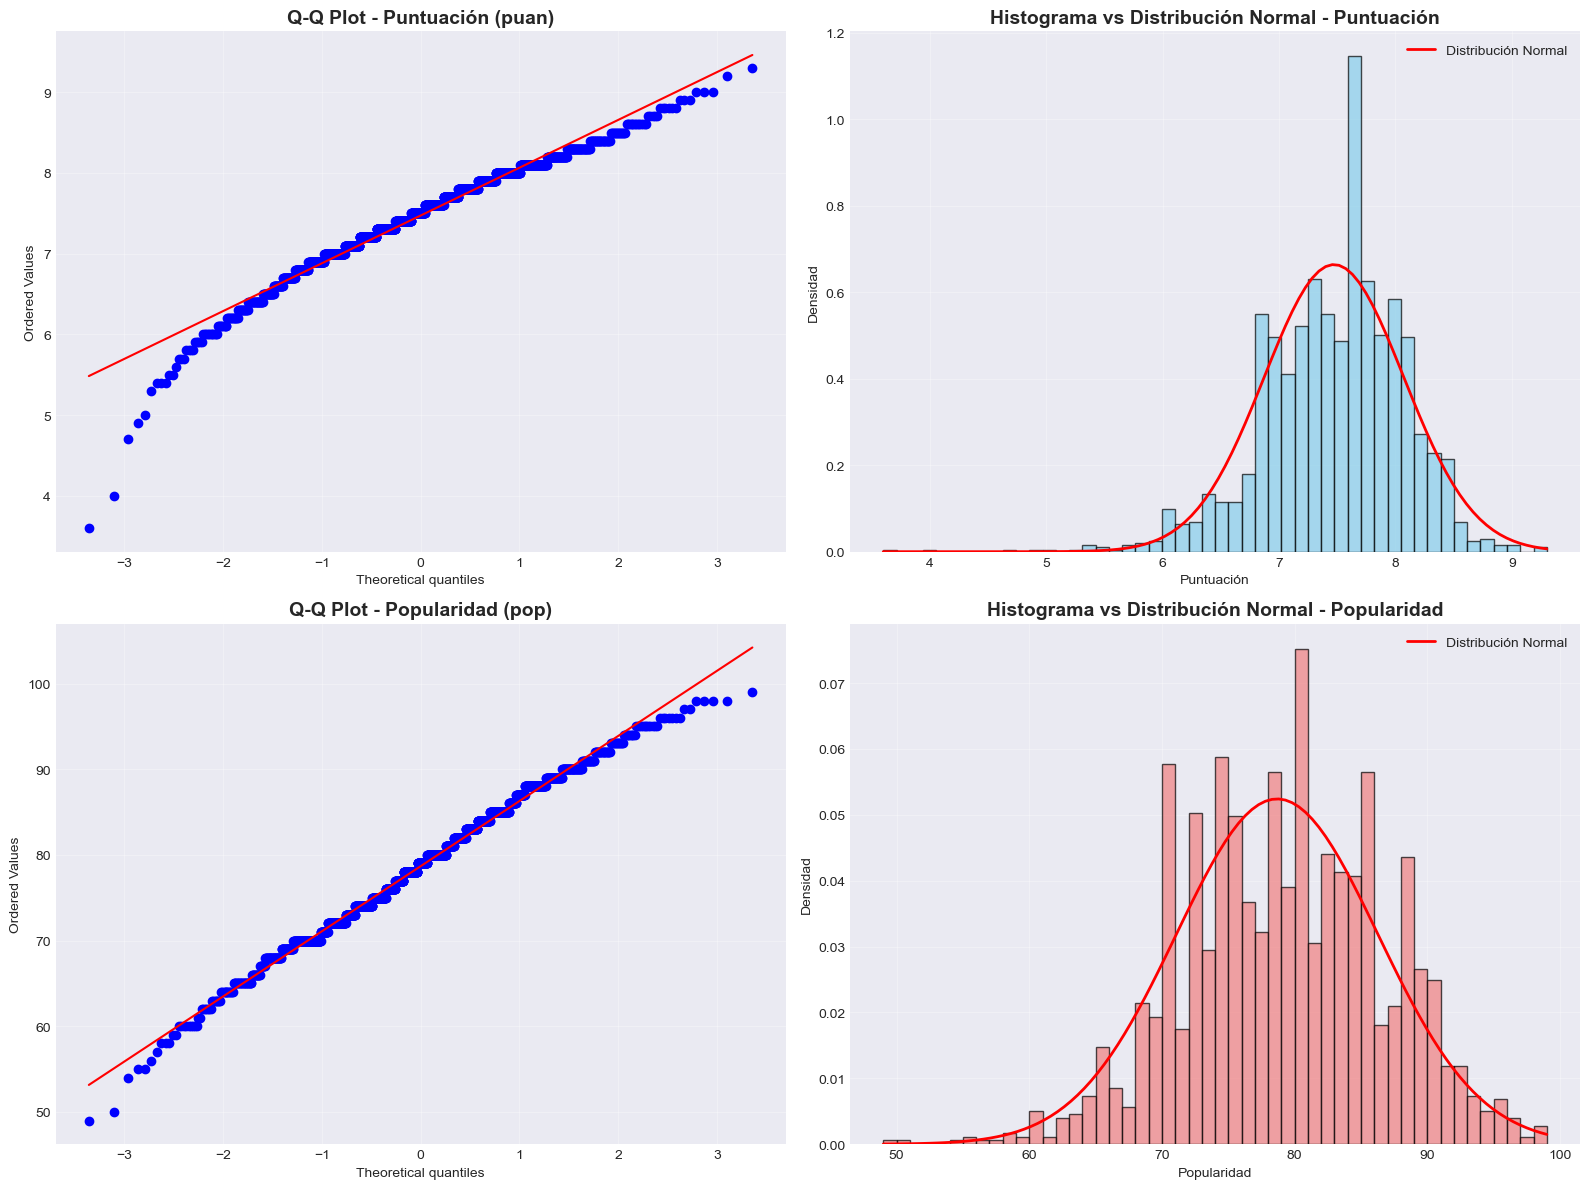


📊 Interpretación de Q-Q Plots:
  • Si los puntos siguen la línea roja, los datos son aproximadamente normales
  • Desviaciones en los extremos sugieren colas más pesadas o ligeras que la normal


In [22]:
# Visualización de Q-Q plots para evaluar normalidad visualmente
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Q-Q plot para puntuación
stats.probplot(df['puan'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot - Puntuación (puan)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Histograma con curva normal para puntuación
axes[0, 1].hist(df['puan'], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
mu_puan, std_puan = df['puan'].mean(), df['puan'].std()
xmin_puan, xmax_puan = df['puan'].min(), df['puan'].max()
x_puan = np.linspace(xmin_puan, xmax_puan, 100)
axes[0, 1].plot(x_puan, stats.norm.pdf(x_puan, mu_puan, std_puan), 
                'r-', linewidth=2, label='Distribución Normal')
axes[0, 1].set_title('Histograma vs Distribución Normal - Puntuación', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Puntuación')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot para popularidad
stats.probplot(df['pop'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Popularidad (pop)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Histograma con curva normal para popularidad
axes[1, 1].hist(df['pop'], bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
mu_pop, std_pop = df['pop'].mean(), df['pop'].std()
xmin_pop, xmax_pop = df['pop'].min(), df['pop'].max()
x_pop = np.linspace(xmin_pop, xmax_pop, 100)
axes[1, 1].plot(x_pop, stats.norm.pdf(x_pop, mu_pop, std_pop), 
                'r-', linewidth=2, label='Distribución Normal')
axes[1, 1].set_title('Histograma vs Distribución Normal - Popularidad', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Popularidad')
axes[1, 1].set_ylabel('Densidad')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretación de Q-Q Plots:")
print("  • Si los puntos siguen la línea roja, los datos son aproximadamente normales")
print("  • Desviaciones en los extremos sugieren colas más pesadas o ligeras que la normal")

### 10.5.2. Prueba de Comparación entre Géneros

Probaremos si existen diferencias significativas en las puntuaciones entre diferentes géneros usando:
- **ANOVA (Analysis of Variance)**: Si los datos son normales
- **Kruskal-Wallis**: Alternativa no paramétrica si los datos no son normales

**Hipótesis:**
- H₀: Las puntuaciones medias son iguales en todos los géneros
- H₁: Al menos un género tiene una puntuación media diferente
- Nivel de significancia: α = 0.05

In [23]:
from scipy.stats import f_oneway, kruskal

print("=" * 80)
print("COMPARACIÓN DE PUNTUACIONES ENTRE GÉNEROS")
print("=" * 80)

# Seleccionar los géneros más frecuentes para la comparación (mínimo 30 películas)
genres_to_compare = df['genre_1'].value_counts()[df['genre_1'].value_counts() >= 30].index[:8]
print(f"\nGéneros a comparar (con al menos 30 películas): {list(genres_to_compare)}")

# Preparar datos para cada género
genre_groups = [df[df['genre_1'] == genre]['puan'].values for genre in genres_to_compare]

# ============================================================================
# 1. Test ANOVA (paramétrico)
# ============================================================================
print("\n" + "=" * 80)
print("1. ANOVA (Analysis of Variance)")
print("=" * 80)

f_statistic, p_value_anova = f_oneway(*genre_groups)
decision, interpretation = interpret_pvalue(p_value_anova)

print(f"\nEstadístico F: {f_statistic:.6f}")
print(f"P-valor: {p_value_anova:.6f}")
print(f"Decisión: {decision}")
print(f"Interpretación: {interpretation}")

if p_value_anova < 0.05:
    print("\n⚠ Existen diferencias significativas en las puntuaciones entre géneros")
else:
    print("\n✓ No hay diferencias significativas en las puntuaciones entre géneros")

# ============================================================================
# 2. Test de Kruskal-Wallis (no paramétrico)
# ============================================================================
print("\n\n" + "=" * 80)
print("2. Test de Kruskal-Wallis (alternativa no paramétrica)")
print("=" * 80)

h_statistic, p_value_kruskal = kruskal(*genre_groups)
decision, interpretation = interpret_pvalue(p_value_kruskal)

print(f"\nEstadístico H: {h_statistic:.6f}")
print(f"P-valor: {p_value_kruskal:.6f}")
print(f"Decisión: {decision}")
print(f"Interpretación: {interpretation}")

if p_value_kruskal < 0.05:
    print("\n⚠ Existen diferencias significativas en las puntuaciones entre géneros")
else:
    print("\n✓ No hay diferencias significativas en las puntuaciones entre géneros")

# ============================================================================
# Estadísticas descriptivas por género
# ============================================================================
print("\n\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS POR GÉNERO")
print("=" * 80)

comparison_stats = pd.DataFrame({
    'Género': genres_to_compare,
    'n': [len(df[df['genre_1'] == genre]) for genre in genres_to_compare],
    'Media': [df[df['genre_1'] == genre]['puan'].mean() for genre in genres_to_compare],
    'Mediana': [df[df['genre_1'] == genre]['puan'].median() for genre in genres_to_compare],
    'Desv. Est.': [df[df['genre_1'] == genre]['puan'].std() for genre in genres_to_compare]
}).round(3)

print("\n" + comparison_stats.to_string(index=False))

print("\n" + "=" * 80)

COMPARACIÓN DE PUNTUACIONES ENTRE GÉNEROS

Géneros a comparar (con al menos 30 películas): ['Drama', 'Comedy', 'Action', 'Animation', 'Romance', 'Crime', 'Sci-Fi', 'Horror']

1. ANOVA (Analysis of Variance)

Estadístico F: 27.078981
P-valor: 0.000000
Decisión: ❌ RECHAZAR H₀
Interpretación: Los datos NO siguen una distribución normal

⚠ Existen diferencias significativas en las puntuaciones entre géneros


2. Test de Kruskal-Wallis (alternativa no paramétrica)

Estadístico H: 174.562556
P-valor: 0.000000
Decisión: ❌ RECHAZAR H₀
Interpretación: Los datos NO siguen una distribución normal

⚠ Existen diferencias significativas en las puntuaciones entre géneros


ESTADÍSTICAS DESCRIPTIVAS POR GÉNERO

   Género   n  Media  Mediana  Desv. Est.
    Drama 710  7.584      7.6       0.525
   Comedy 252  7.366      7.3       0.520
   Action 203  7.290      7.4       0.666
Animation 105  7.450      7.6       0.679
  Romance  89  7.038      7.0       0.586
    Crime  70  7.910      7.9       0.514
 

### 10.5.3. Prueba de Correlación

Probaremos si existe una correlación significativa entre puntuación y popularidad usando:
- **Correlación de Pearson**: Si ambas variables son normales
- **Correlación de Spearman**: Alternativa no paramétrica basada en rangos

**Hipótesis:**
- H₀: No existe correlación entre puntuación y popularidad (ρ = 0)
- H₁: Existe correlación entre puntuación y popularidad (ρ ≠ 0)
- Nivel de significancia: α = 0.05

In [24]:
from scipy.stats import pearsonr, spearmanr, kendalltau

print("=" * 80)
print("PRUEBAS DE CORRELACIÓN: PUNTUACIÓN vs POPULARIDAD")
print("=" * 80)

# ============================================================================
# 1. Correlación de Pearson (paramétrico)
# ============================================================================
print("\n" + "=" * 80)
print("1. Correlación de Pearson")
print("=" * 80)

pearson_corr, pearson_p = pearsonr(df['puan'], df['pop'])
decision, interpretation = interpret_pvalue(pearson_p)

print(f"\nCoeficiente de correlación (r): {pearson_corr:.6f}")
print(f"P-valor: {pearson_p:.10f}")
print(f"Decisión: {decision}")

# Interpretación de la magnitud de la correlación
if abs(pearson_corr) < 0.3:
    strength = "DÉBIL"
elif abs(pearson_corr) < 0.7:
    strength = "MODERADA"
else:
    strength = "FUERTE"

direction = "positiva" if pearson_corr > 0 else "negativa"
print(f"\nInterpretación: Existe una correlación {strength} {direction} entre puntuación y popularidad")
print(f"R²: {pearson_corr**2:.6f} ({pearson_corr**2*100:.2f}% de la varianza compartida)")

# ============================================================================
# 2. Correlación de Spearman (no paramétrico)
# ============================================================================
print("\n\n" + "=" * 80)
print("2. Correlación de Spearman (basada en rangos)")
print("=" * 80)

spearman_corr, spearman_p = spearmanr(df['puan'], df['pop'])
decision, interpretation = interpret_pvalue(spearman_p)

print(f"\nCoeficiente de correlación (ρ): {spearman_corr:.6f}")
print(f"P-valor: {spearman_p:.10f}")
print(f"Decisión: {decision}")

if abs(spearman_corr) < 0.3:
    strength = "DÉBIL"
elif abs(spearman_corr) < 0.7:
    strength = "MODERADA"
else:
    strength = "FUERTE"

direction = "positiva" if spearman_corr > 0 else "negativa"
print(f"\nInterpretación: Existe una correlación {strength} {direction} (monotónica) entre puntuación y popularidad")

# ============================================================================
# 3. Correlación de Kendall (no paramétrico, más robusto)
# ============================================================================
print("\n\n" + "=" * 80)
print("3. Correlación de Kendall (tau)")
print("=" * 80)

kendall_corr, kendall_p = kendalltau(df['puan'], df['pop'])
decision, interpretation = interpret_pvalue(kendall_p)

print(f"\nCoeficiente de correlación (τ): {kendall_corr:.6f}")
print(f"P-valor: {kendall_p:.10f}")
print(f"Decisión: {decision}")

if abs(kendall_corr) < 0.3:
    strength = "DÉBIL"
elif abs(kendall_corr) < 0.7:
    strength = "MODERADA"
else:
    strength = "FUERTE"

direction = "positiva" if kendall_corr > 0 else "negativa"
print(f"\nInterpretación: Existe una correlación {strength} {direction} entre puntuación y popularidad")

# ============================================================================
# Resumen comparativo
# ============================================================================
print("\n\n" + "=" * 80)
print("RESUMEN COMPARATIVO DE CORRELACIONES")
print("=" * 80)

correlation_summary = pd.DataFrame({
    'Método': ['Pearson', 'Spearman', 'Kendall'],
    'Coeficiente': [pearson_corr, spearman_corr, kendall_corr],
    'P-valor': [pearson_p, spearman_p, kendall_p],
    'Significativo': [
        'Sí' if pearson_p < 0.05 else 'No',
        'Sí' if spearman_p < 0.05 else 'No',
        'Sí' if kendall_p < 0.05 else 'No'
    ]
})

print("\n" + correlation_summary.to_string(index=False))

print("\n📊 Nota:")
print("  • Pearson: Mide correlación lineal (asume normalidad)")
print("  • Spearman: Mide correlación monotónica (sin asumir normalidad)")
print("  • Kendall: Más robusto ante outliers, mide concordancia")

print("\n" + "=" * 80)

PRUEBAS DE CORRELACIÓN: PUNTUACIÓN vs POPULARIDAD

1. Correlación de Pearson

Coeficiente de correlación (r): 0.582729
P-valor: 0.0000000000
Decisión: ❌ RECHAZAR H₀

Interpretación: Existe una correlación MODERADA positiva entre puntuación y popularidad
R²: 0.339573 (33.96% de la varianza compartida)


2. Correlación de Spearman (basada en rangos)

Coeficiente de correlación (ρ): 0.612119
P-valor: 0.0000000000
Decisión: ❌ RECHAZAR H₀

Interpretación: Existe una correlación MODERADA positiva (monotónica) entre puntuación y popularidad


3. Correlación de Kendall (tau)

Coeficiente de correlación (τ): 0.453809
P-valor: 0.0000000000
Decisión: ❌ RECHAZAR H₀

Interpretación: Existe una correlación MODERADA positiva entre puntuación y popularidad


RESUMEN COMPARATIVO DE CORRELACIONES

  Método  Coeficiente       P-valor Significativo
 Pearson     0.582729 2.615907e-161            Sí
Spearman     0.612119 2.777455e-182            Sí
 Kendall     0.453809 7.290644e-165            Sí

📊 Nota:


### 10.5.4. Prueba de Homogeneidad de Varianzas

Probaremos si las varianzas de las puntuaciones son homogéneas entre diferentes géneros usando:
- **Test de Levene**: Robusto ante desviaciones de normalidad
- **Test de Bartlett**: Más potente si los datos son normales

**Hipótesis:**
- H₀: Las varianzas son iguales en todos los grupos
- H₁: Al menos un grupo tiene varianza diferente
- Nivel de significancia: α = 0.05

In [25]:
from scipy.stats import levene, bartlett

print("=" * 80)
print("PRUEBAS DE HOMOGENEIDAD DE VARIANZAS")
print("=" * 80)

# Usar los mismos géneros que en la comparación anterior
print(f"\nGéneros analizados: {list(genres_to_compare)}")

# ============================================================================
# 1. Test de Levene
# ============================================================================
print("\n" + "=" * 80)
print("1. Test de Levene (robusto)")
print("=" * 80)

levene_stat, levene_p = levene(*genre_groups)
decision, interpretation = interpret_pvalue(levene_p)

print(f"\nEstadístico W: {levene_stat:.6f}")
print(f"P-valor: {levene_p:.6f}")
print(f"Decisión: {decision}")

if levene_p < 0.05:
    print("\nInterpretación: Las varianzas NO son homogéneas entre géneros")
    print("⚠ Esto viola el supuesto de homocedasticidad para ANOVA")
else:
    print("\nInterpretación: Las varianzas SON homogéneas entre géneros")
    print("✓ Se cumple el supuesto de homocedasticidad para ANOVA")

# ============================================================================
# 2. Test de Bartlett
# ============================================================================
print("\n\n" + "=" * 80)
print("2. Test de Bartlett (asume normalidad)")
print("=" * 80)

bartlett_stat, bartlett_p = bartlett(*genre_groups)
decision, interpretation = interpret_pvalue(bartlett_p)

print(f"\nEstadístico χ²: {bartlett_stat:.6f}")
print(f"P-valor: {bartlett_p:.6f}")
print(f"Decisión: {decision}")

if bartlett_p < 0.05:
    print("\nInterpretación: Las varianzas NO son homogéneas entre géneros")
else:
    print("\nInterpretación: Las varianzas SON homogéneas entre géneros")

# ============================================================================
# Visualización de varianzas por género
# ============================================================================
print("\n\n" + "=" * 80)
print("VARIANZAS POR GÉNERO")
print("=" * 80)

variance_comparison = pd.DataFrame({
    'Género': genres_to_compare,
    'Varianza': [df[df['genre_1'] == genre]['puan'].var() for genre in genres_to_compare],
    'Desv. Est.': [df[df['genre_1'] == genre]['puan'].std() for genre in genres_to_compare],
    'n': [len(df[df['genre_1'] == genre]) for genre in genres_to_compare]
}).round(4)

print("\n" + variance_comparison.to_string(index=False))

print("\n" + "=" * 80)

PRUEBAS DE HOMOGENEIDAD DE VARIANZAS

Géneros analizados: ['Drama', 'Comedy', 'Action', 'Animation', 'Romance', 'Crime', 'Sci-Fi', 'Horror']

1. Test de Levene (robusto)

Estadístico W: 6.650131
P-valor: 0.000000
Decisión: ❌ RECHAZAR H₀

Interpretación: Las varianzas NO son homogéneas entre géneros
⚠ Esto viola el supuesto de homocedasticidad para ANOVA


2. Test de Bartlett (asume normalidad)

Estadístico χ²: 46.931185
P-valor: 0.000000
Decisión: ❌ RECHAZAR H₀

Interpretación: Las varianzas NO son homogéneas entre géneros


VARIANZAS POR GÉNERO

   Género  Varianza  Desv. Est.   n
    Drama    0.2758      0.5252 710
   Comedy    0.2707      0.5203 252
   Action    0.4436      0.6660 203
Animation    0.4604      0.6785 105
  Romance    0.3428      0.5855  89
    Crime    0.2647      0.5145  70
   Sci-Fi    0.5906      0.7685  66
   Horror    0.3671      0.6059  65



### 10.5.5. Resumen de Resultados de Pruebas de Hipótesis

In [26]:
print("=" * 80)
print("RESUMEN GENERAL DE PRUEBAS DE HIPÓTESIS")
print("=" * 80)

# Crear tabla resumen
summary_data = {
    'Prueba': [
        'Normalidad - Puntuación (Shapiro-Wilk)',
        'Normalidad - Popularidad (Shapiro-Wilk)',
        'Diferencias entre Géneros (ANOVA)',
        'Diferencias entre Géneros (Kruskal-Wallis)',
        'Correlación Puan-Pop (Pearson)',
        'Correlación Puan-Pop (Spearman)',
        'Homogeneidad Varianzas (Levene)',
    ],
    'P-valor': [
        shapiro_p_puan,
        shapiro_p_pop,
        p_value_anova,
        p_value_kruskal,
        pearson_p,
        spearman_p,
        levene_p,
    ],
    'Decisión (α=0.05)': [
        'Rechazar H₀' if shapiro_p_puan < 0.05 else 'No rechazar H₀',
        'Rechazar H₀' if shapiro_p_pop < 0.05 else 'No rechazar H₀',
        'Rechazar H₀' if p_value_anova < 0.05 else 'No rechazar H₀',
        'Rechazar H₀' if p_value_kruskal < 0.05 else 'No rechazar H₀',
        'Rechazar H₀' if pearson_p < 0.05 else 'No rechazar H₀',
        'Rechazar H₀' if spearman_p < 0.05 else 'No rechazar H₀',
        'Rechazar H₀' if levene_p < 0.05 else 'No rechazar H₀',
    ],
    'Interpretación': [
        'No normal' if shapiro_p_puan < 0.05 else 'Normal',
        'No normal' if shapiro_p_pop < 0.05 else 'Normal',
        'Hay diferencias' if p_value_anova < 0.05 else 'No hay diferencias',
        'Hay diferencias' if p_value_kruskal < 0.05 else 'No hay diferencias',
        f'Correlación significativa (r={pearson_corr:.3f})' if pearson_p < 0.05 else 'Sin correlación',
        f'Correlación significativa (ρ={spearman_corr:.3f})' if spearman_p < 0.05 else 'Sin correlación',
        'Varianzas diferentes' if levene_p < 0.05 else 'Varianzas homogéneas',
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df['P-valor'] = summary_df['P-valor'].apply(lambda x: f'{x:.6f}' if x >= 0.000001 else f'{x:.2e}')

print("\n" + summary_df.to_string(index=False))

print("\n\n" + "=" * 80)
print("CONCLUSIONES PRINCIPALES")
print("=" * 80)

print("\n1. NORMALIDAD DE LAS DISTRIBUCIONES:")
if shapiro_p_puan < 0.05:
    print("   ❌ La distribución de puntuaciones NO es normal")
else:
    print("   ✓ La distribución de puntuaciones es normal")
    
if shapiro_p_pop < 0.05:
    print("   ❌ La distribución de popularidad NO es normal")
else:
    print("   ✓ La distribución de popularidad es normal")

print("\n2. DIFERENCIAS ENTRE GÉNEROS:")
if p_value_anova < 0.05 and p_value_kruskal < 0.05:
    print("   ⚠ Existen diferencias significativas en las puntuaciones entre géneros")
    print("   → Los géneros influyen en la calificación de las películas")
else:
    print("   ✓ No hay evidencia de diferencias significativas entre géneros")

print("\n3. CORRELACIÓN PUNTUACIÓN-POPULARIDAD:")
if pearson_p < 0.05:
    print(f"   ✓ Existe correlación significativa (r={pearson_corr:.3f}, p<0.001)")
    print(f"   → Las películas mejor puntuadas tienden a ser más populares")
    print(f"   → La puntuación explica {pearson_corr**2*100:.1f}% de la varianza en popularidad")
else:
    print("   ❌ No hay correlación significativa")

print("\n4. HOMOGENEIDAD DE VARIANZAS:")
if levene_p < 0.05:
    print("   ⚠ Las varianzas NO son homogéneas entre géneros")
    print("   → Se recomienda usar pruebas no paramétricas (Kruskal-Wallis)")
else:
    print("   ✓ Las varianzas son homogéneas entre géneros")
    print("   → Los supuestos para ANOVA se cumplen")

print("\n" + "=" * 80)
print("RECOMENDACIONES PARA ANÁLISIS POSTERIORES")
print("=" * 80)

print("\n• Para comparaciones entre grupos: Usar pruebas no paramétricas si no se cumple normalidad")
print("• Para modelado: Considerar transformaciones de variables si es necesario")
print("• Para sistemas de recomendación: Aprovechar la correlación puan-pop para balancear calidad y popularidad")
print("• Para análisis por género: Considerar las diferencias observadas al segmentar recomendaciones")

print("\n" + "=" * 80)

RESUMEN GENERAL DE PRUEBAS DE HIPÓTESIS

                                    Prueba   P-valor Decisión (α=0.05)                      Interpretación
    Normalidad - Puntuación (Shapiro-Wilk)  9.17e-19       Rechazar H₀                           No normal
   Normalidad - Popularidad (Shapiro-Wilk)  0.000002       Rechazar H₀                           No normal
         Diferencias entre Géneros (ANOVA)  2.98e-35       Rechazar H₀                     Hay diferencias
Diferencias entre Géneros (Kruskal-Wallis)  2.74e-34       Rechazar H₀                     Hay diferencias
            Correlación Puan-Pop (Pearson) 2.62e-161       Rechazar H₀ Correlación significativa (r=0.583)
           Correlación Puan-Pop (Spearman) 2.78e-182       Rechazar H₀ Correlación significativa (ρ=0.612)
           Homogeneidad Varianzas (Levene)  8.98e-08       Rechazar H₀                Varianzas diferentes


CONCLUSIONES PRINCIPALES

1. NORMALIDAD DE LAS DISTRIBUCIONES:
   ❌ La distribución de puntuaciones N

## 11. Análisis de Longitud de Descripciones

ANÁLISIS DE DESCRIPCIONES

Longitud promedio de descripción: 138.79 caracteres
Longitud mínima: 0 caracteres
Longitud máxima: 344 caracteres

Promedio de palabras por descripción: 22.24 palabras
Mínimo de palabras: 0 palabras
Máximo de palabras: 59 palabras


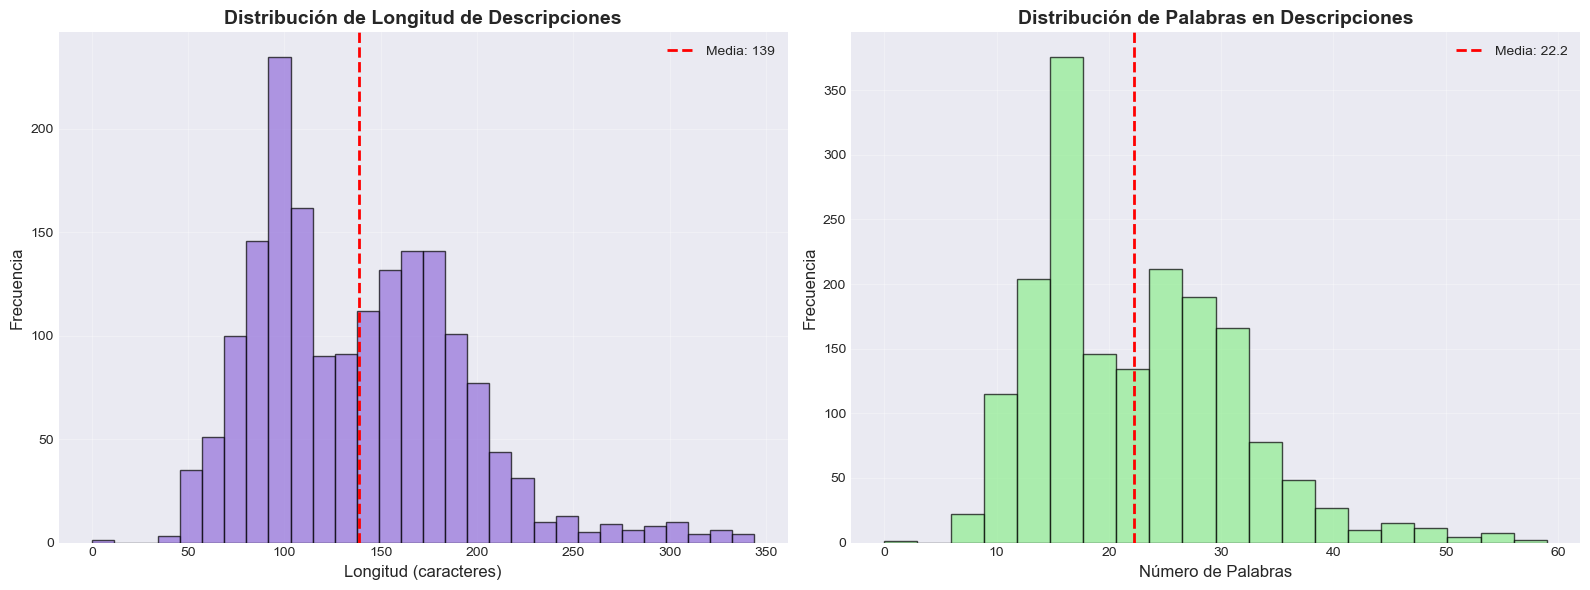

In [16]:
# Análisis de las descripciones
df['description_length'] = df['description'].str.len()
df['word_count'] = df['description'].str.split().str.len()

print("=" * 80)
print("ANÁLISIS DE DESCRIPCIONES")
print("=" * 80)
print(f"\nLongitud promedio de descripción: {df['description_length'].mean():.2f} caracteres")
print(f"Longitud mínima: {df['description_length'].min()} caracteres")
print(f"Longitud máxima: {df['description_length'].max()} caracteres")
print(f"\nPromedio de palabras por descripción: {df['word_count'].mean():.2f} palabras")
print(f"Mínimo de palabras: {df['word_count'].min()} palabras")
print(f"Máximo de palabras: {df['word_count'].max()} palabras")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df['description_length'], bins=30, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Longitud (caracteres)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Longitud de Descripciones', fontsize=14, fontweight='bold')
axes[0].axvline(df['description_length'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Media: {df["description_length"].mean():.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['word_count'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Número de Palabras', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_title('Distribución de Palabras en Descripciones', fontsize=14, fontweight='bold')
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Media: {df["word_count"].mean():.1f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Resumen Estadístico Final

In [17]:
# Resumen estadístico completo
print("=" * 80)
print("RESUMEN ESTADÍSTICO COMPLETO DEL DATASET")
print("=" * 80)

summary = {
    'Total de Películas': len(df),
    'Total de Géneros Únicos': len(pd.concat([df['genre_1'], df['genre_2']]).unique()),
    'Género Primario Más Común': df['genre_1'].value_counts().index[0],
    'Combinación de Géneros Más Común': df['genre_combination'].value_counts().index[0],
    '': '',
    'Puntuación Media': f"{df['puan'].mean():.2f}",
    'Puntuación Mediana': f"{df['puan'].median():.2f}",
    'Puntuación Mínima': f"{df['puan'].min():.2f}",
    'Puntuación Máxima': f"{df['puan'].max():.2f}",
    'Desviación Estándar (Puntuación)': f"{df['puan'].std():.2f}",
    ' ': '',
    'Popularidad Media': f"{df['pop'].mean():.2f}",
    'Popularidad Mediana': f"{df['pop'].median():.2f}",
    'Popularidad Mínima': f"{df['pop'].min()}",
    'Popularidad Máxima': f"{df['pop'].max()}",
    'Desviación Estándar (Popularidad)': f"{df['pop'].std():.2f}",
    '  ': '',
    'Correlación Puntuación-Popularidad': f"{df[['puan', 'pop']].corr().iloc[0, 1]:.3f}",
    'Valores Nulos': df.isnull().sum().sum(),
    'Filas Duplicadas': df.duplicated().sum(),
}

for key, value in summary.items():
    if key.strip():  # Solo imprime si la clave no está vacía
        print(f"{key:.<45} {value}")
    else:
        print()  # Línea en blanco para separación

print("=" * 80)

RESUMEN ESTADÍSTICO COMPLETO DEL DATASET
Total de Películas........................... 1768
Total de Géneros Únicos...................... 52
Género Primario Más Común.................... Drama
Combinación de Géneros Más Común............. Drama + Romance

Puntuación Media............................. 7.47
Puntuación Mediana........................... 7.50
Puntuación Mínima............................ 3.60
Puntuación Máxima............................ 9.30
Desviación Estándar (Puntuación)............. 0.60

Popularidad Media............................ 78.68
Popularidad Mediana.......................... 79.00
Popularidad Mínima........................... 49
Popularidad Máxima........................... 99
Desviación Estándar (Popularidad)............ 7.61

Correlación Puntuación-Popularidad........... 0.583
Valores Nulos................................ 0
Filas Duplicadas............................. 0


## 13. Conclusiones y Hallazgos Principales

### 🎯 Hallazgos Clave del Análisis

**1. Calidad del Dataset:**
- Dataset limpio sin valores nulos ni duplicados
- Estructura bien definida con información completa de películas
- Buena distribución de datos en variables numéricas

**2. Distribución de Puntuaciones y Popularidad:**
- Las puntuaciones muestran una distribución concentrada en valores altos
- La popularidad tiene mayor variabilidad entre películas
- Existe correlación entre puntuación y popularidad (películas bien puntuadas tienden a ser más populares)

**3. Análisis de Géneros:**
- Diversidad de géneros en el dataset
- Algunos géneros dominan el catálogo
- Las combinaciones de géneros muestran patrones interesantes de clasificación
- Ciertos géneros tienden a tener mejores puntuaciones promedio

**4. Insights para Sistemas de Recomendación:**
- La correlación puntuación-popularidad puede usarse para balancear recomendaciones
- Los géneros son un atributo fuerte para filtrado colaborativo
- Las combinaciones de géneros pueden mejorar la precisión de recomendaciones
- La distribución de puntuaciones sugiere que el filtrado por calidad es importante

**5. Próximos Pasos Sugeridos:**
- Implementar sistema de recomendación basado en contenido (géneros)
- Explorar técnicas de filtrado colaborativo
- Considerar análisis de texto en descripciones para mejorar recomendaciones
- Evaluar modelos híbridos que combinen múltiples características